In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [84]:
# Cargamos los datasets
df_webdata = pd.read_csv('Cleaning/df_webdata.csv')

In [85]:
# Convertir la columna 'duration' a segundos
df_webdata['duration_sec'] = pd.to_timedelta(df_webdata['duration']).dt.total_seconds()

# Convertir la variable 'confirm' en binaria
df_webdata['confirm_binary'] = df_webdata['confirm'].apply(lambda x: 1 if x > 0 else 0)

# Codificar la variable categórica 'variation'
label_encoder = LabelEncoder()
df_webdata['variation_encoded'] = label_encoder.fit_transform(df_webdata['variation'])

# Seleccionar características y etiqueta
X = df_webdata[['duration_sec', 'variation_encoded']]
y = df_webdata['confirm_binary']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 7901  5929]
 [ 2920 15073]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.57      0.64     13830
           1       0.72      0.84      0.77     17993

    accuracy                           0.72     31823
   macro avg       0.72      0.70      0.71     31823
weighted avg       0.72      0.72      0.72     31823



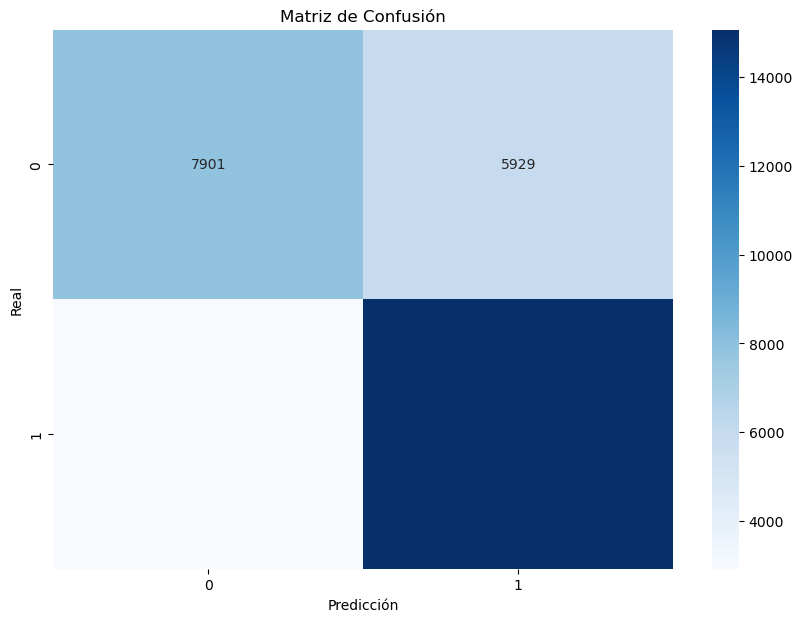

In [86]:
# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [87]:
# Función para hacer predicciones con input en segundos
def make_prediction(duration_sec, variation):
    variation_encoded = label_encoder.transform([variation])[0]
    prediction = model.predict([[duration_sec, variation_encoded]])
    return 'Confirmado' if prediction[0] == 1 else 'No Confirmado'

In [98]:
# Ejemplo de uso de la función de predicción
duration_sec_input = 3000  # Ejemplo: 300 segundos
variation_input = 'Control'  # Ejemplo: 'Test'
prediction = make_prediction(duration_sec_input, variation_input)
print(f'Predicción para duración {duration_sec_input} segundos y variación {variation_input}: {prediction}')

Predicción para duración 3000 segundos y variación Control: Confirmado
